In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
make_classification?

In [4]:
X,Y = make_classification(n_samples=400,n_features=2,n_informative=2,n_redundant=0,n_classes=2,random_state=3,n_clusters_per_class=1)

In [10]:
Y[Y==0]=-1
Y

array([-1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1, -1, -1

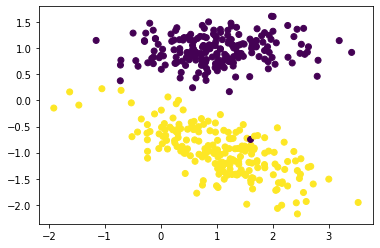

In [11]:
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

In [27]:
class SVM :
    def __init__(self,C=1.0):
        self.C = C
        self.w = 0
        self.b = 0
    def hingeloss(self,w,x,y,b):
        loss = 0.0
        loss += 0.5*np.dot(w,w.T)
        
        m = x.shape[0]
        
        for i in range(m):
            ti = y[i]*(np.dot(w,x[i].T)+b)
            
            loss += self.C*(max(0,1-ti))
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        n_features = X.shape[1]
        n_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        w = np.zeros((1,n_features))
        bias = 0
        
        
        losses = []
        
        for i in range(maxItr):
            
            l = self.hingeloss(w,X,Y,bias)
            losses.append(l)
            ids = np.arange(0,n_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,n_samples,batch_size):
                gradw = 0.0
                gradb = 0.0
                for j in range(batch_start,batch_start+batch_size):
                    if j<n_samples : 
                        i = ids[j]
                        ti = Y[i]*(np.dot(w,X[i].T)+bias)
                        
                        if ti >= 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*X[i]*Y[i]
                            gradb += c*Y[i]
                w = w -n*w + n*gradw
                bias = bias + n*gradb
        self.w = w
        self.b = bias
        
        return w,bias,losses

In [28]:
mySVM = SVM(C=1000)
w,b,losses = mySVM.fit(X,Y,maxItr=100)

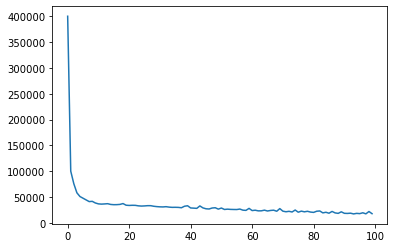

In [29]:
plt.plot(losses)

In [37]:
def hyperplane(w1,w2,b):
    
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2
    
    x_p = -(w1*x_1+b+1)/w2
    x_n = -(w1*x_1+b-1)/w2
    
    plt.plot(x_1,x_2,label="Hyperplane WX+B=0")
    plt.plot(x_1,x_p,label="+Ve Hyperplane WX+B=1")
    plt.plot(x_1,x_n,label="-Ve Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

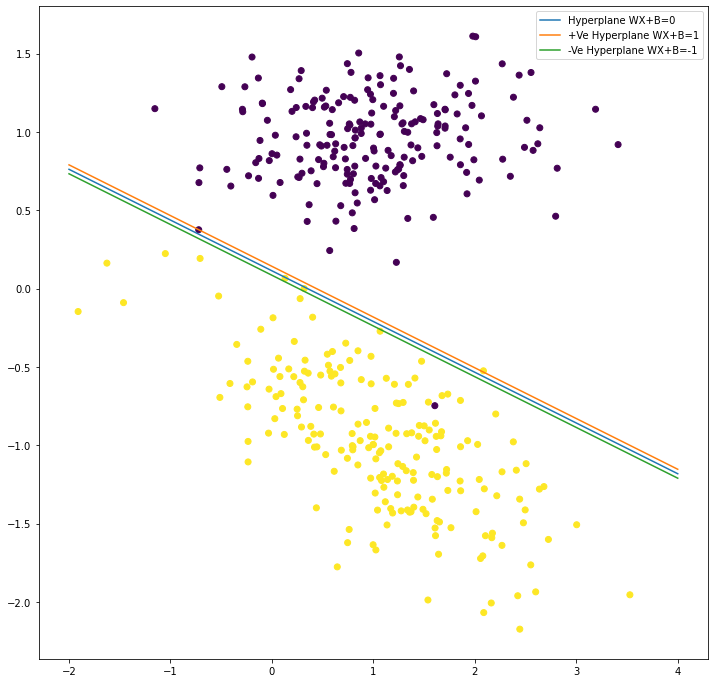

In [38]:
hyperplane(w[0,0],w[0,1],b)